## Работа с контурами

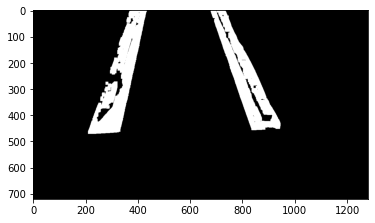

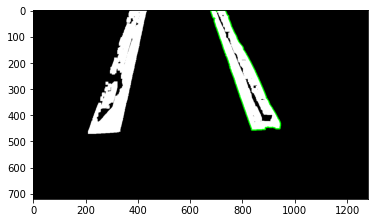

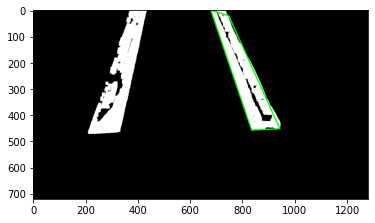

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("rails.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# fig, ax = plt.subplots()
# ax.hist(img[::5, ::5, 0].ravel(), 25, [0,256])
# plt.show()

ret, otsu = cv2.threshold(img[:, :, 0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#print(ret)

# plt.imshow(otsu, cmap = "gray")
# plt.show()

# plt.imshow(img[:, :, 0])
# plt.show()

kernel = np.ones((11, 11), np.uint8)

morph = cv2.morphologyEx(otsu, cv2.MORPH_OPEN, kernel)

# plt.imshow(morph, cmap="gray")
# plt.show()

filtered = np.zeros_like(morph)

connectivity = 4  
output = cv2.connectedComponentsWithStats(morph, connectivity, cv2.CV_32S)
num_labels = output[0]
labels = output[1]
stats = output[2]

for i in range(1, num_labels):
    t = stats[i, cv2.CC_STAT_TOP]
    l = stats[i, cv2.CC_STAT_LEFT]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    a = stats[i, cv2.CC_STAT_AREA]

    if (a > 18000):
        filtered[np.where(labels == i)] = 255

plt.imshow(filtered, cmap="gray")
plt.show()

############

contours, hierarchy = cv2.findContours(filtered, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

three_ch = cv2.cvtColor(filtered, cv2.COLOR_GRAY2RGB)

cv2.drawContours(three_ch, contours, 0, (0,255,0), 3)

plt.imshow(three_ch, cmap="gray")
plt.show()

cont_len = cv2.arcLength(contours[0], True)
epsilon = 0.02 * cont_len
approx = cv2.approxPolyDP(contours[0], epsilon, True)

three_ch_approx = cv2.cvtColor(filtered, cv2.COLOR_GRAY2RGB)
cv2.drawContours(three_ch_approx, [approx], 0, (0,255,0), 3)

plt.imshow(three_ch_approx, cmap="gray")
plt.show()

In [44]:
print(cv2.arcLength(contours[0], True))
print(cv2.arcLength(approx, True))

print(len(contours[0]), len(approx))

1259.7442899942398
1135.6501541137695
655 4



## Вычитание фона

In [12]:
import numpy as np
import cv2

cam = cv2.VideoCapture(0)

succ, frame = cam.read()

if (succ == False):
    print("Cam not opening")
    assert(False)

backgr = np.zeros_like(frame)

while(True):
    succ, frame = cam.read()
    
    if (succ == False):
        break
    
    backgr = cv2.addWeighted(backgr, 0.9, frame, 0.1, 0)
    diff = cv2.absdiff(backgr, frame)
    
    mask = cv2.inRange(diff, (20, 20, 20), (255, 255, 255))
    
    cv2.imshow("average", backgr)
    key = cv2.waitKey(50)
    
    if (key == ord('q')):
        break

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

## Лепешки

## Выпуклость

## Seamless cloning

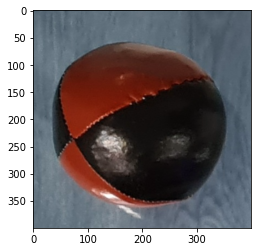

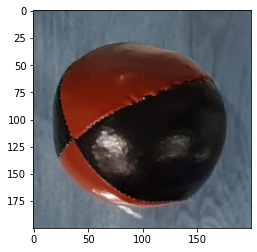

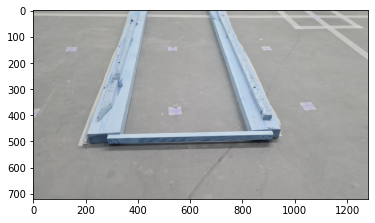

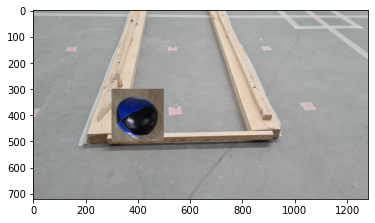

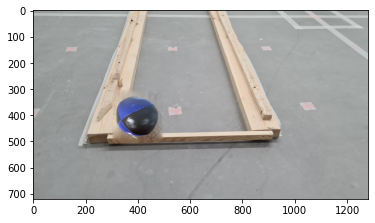

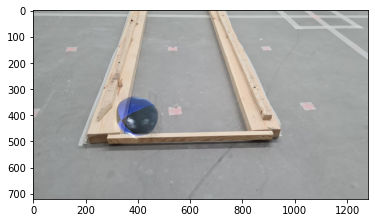

In [20]:
import copy

src_ = cv2.imread("objects.jpg")[250:650, 250:650, :]
src = src_[::2, ::2, :]

plt.imshow(src_)
plt.show()
plt.imshow(src)
plt.show()

dst = cv2.imread("rails.jpg")
plt.imshow(dst)
plt.show()

mask = np.ones_like(src) * 255

output_crop = copy.deepcopy(dst)

w, h, _ = src.shape

output_crop[400 - w // 2 : 400 + w // 2, 400 - h // 2 : 400 + h // 2, :] = src
plt.imshow(cv2.cvtColor(output_crop, cv2.COLOR_RGB2BGR))
plt.show()

output_normal = cv2.seamlessClone(src, dst, mask, (400, 400), cv2.NORMAL_CLONE)
plt.imshow(cv2.cvtColor(output_normal, cv2.COLOR_RGB2BGR))
plt.show()

output_mixed = cv2.seamlessClone(src, dst, mask, (400, 400), cv2.MIXED_CLONE)
plt.imshow(cv2.cvtColor(output_mixed, cv2.COLOR_RGB2BGR))
plt.show()

## Скелетонизация

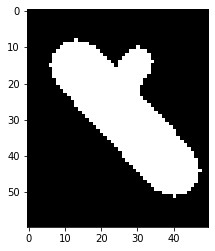

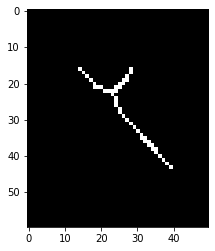

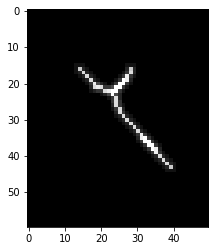

0


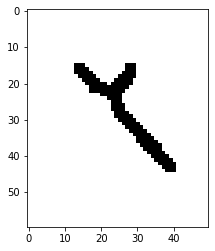

14


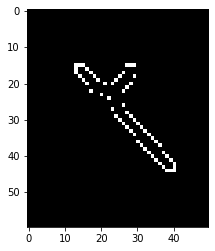

28


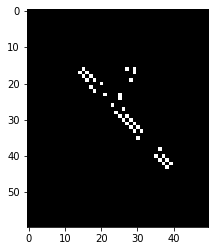

42


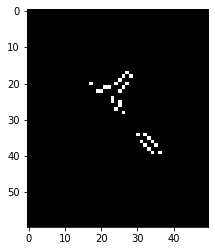

57


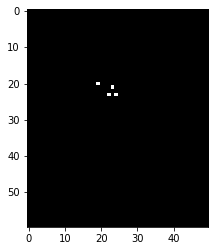

156


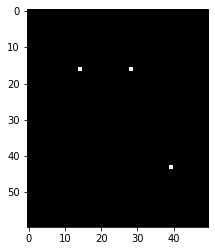

170


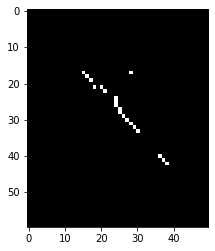

184


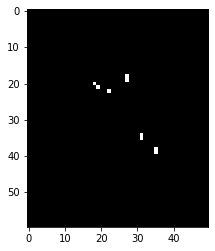

198


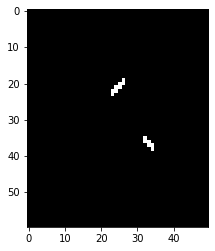

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = np.zeros((60, 50), np.uint8)

cv2.line(img, (13, 15), (40, 44), (255), 13)
cv2.line(img, (23, 25), (30, 14), (255), 7)

thinned = cv2.ximgproc.thinning(img)

plt.imshow(img, cmap="gray")
plt.show()

plt.imshow(thinned, cmap="gray")
plt.show()

kernel = np.ones((3, 3), np.float32)
kernel[1, 1] = 10

kernel /= 18.0

filtered = cv2.filter2D(thinned, ddepth=-1, kernel=kernel)

plt.imshow(filtered, cmap="gray")
plt.show()

for val in [0, 14, 28, 42, 57, 156, 170, 184, 198]:
    border = np.zeros_like(img)
    print(val)
    border[np.where(filtered == val)] = 255

    plt.imshow(border, cmap="gray")
    plt.show()

In [37]:
print(kernel)

[[0.05555556 0.05555556 0.05555556]
 [0.05555556 0.5555556  0.05555556]
 [0.05555556 0.05555556 0.05555556]]


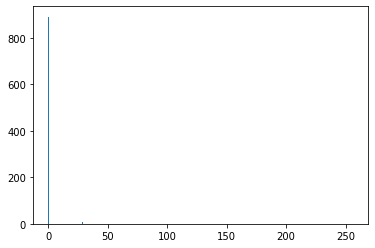

In [39]:
fig, ax = plt.subplots()
ax.hist(filtered.ravel(), 256, [0,256])
plt.show()


[[0.07692308 0.07692308 0.07692308]
 [0.07692308 0.3846154  0.07692308]
 [0.07692308 0.07692308 0.07692308]]


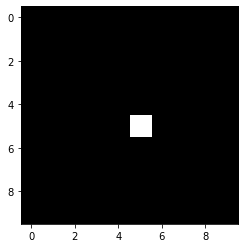

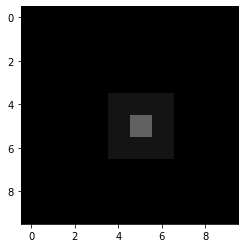

In [44]:
img = np.zeros((10, 10), np.uint8)

img[5, 5] = 255

kernel = np.ones((3, 3), np.float32)
kernel[1, 1] = 5
kernel /= 13.0
print(kernel)

255 * 0.38 + 8 * 255 * 0.08
0 * 0.38 + 0.08 * 255 + 7 * 0

filtered = cv2.filter2D(img, ddepth=-1, kernel=kernel)

plt.imshow(img, cmap="gray")
plt.show()
plt.imshow(filtered, cmap="gray", vmin=0, vmax=255)
plt.show()

## Адаптивная бинаризация

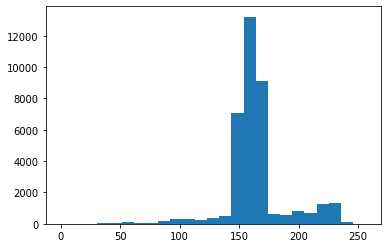

185.0


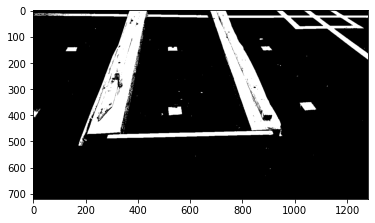

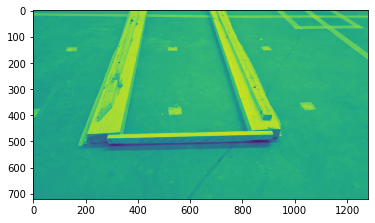

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("rails.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots()
ax.hist(img[::5, ::5, 0].ravel(), 25, [0,256])
plt.show()

#fig.canvas.draw()

ret, otsu = cv2.threshold(img[:, :, 0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(ret)

plt.imshow(otsu, cmap = "gray")
plt.show()

plt.imshow(img[:, :, 0])
plt.show()

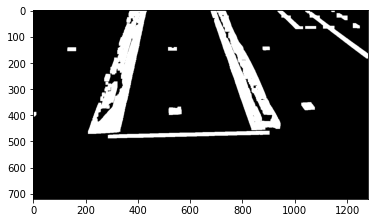

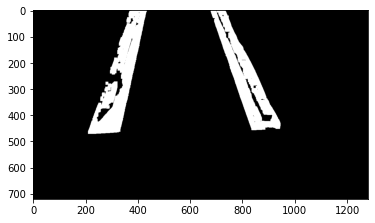

In [11]:
import numpy as np

kernel = np.ones((11, 11), np.uint8)

morph = cv2.morphologyEx(otsu, cv2.MORPH_OPEN, kernel)

plt.imshow(morph, cmap="gray")

plt.show()

filtered = np.zeros_like(morph)

connectivity = 4  
output = cv2.connectedComponentsWithStats(morph, connectivity, cv2.CV_32S)
num_labels = output[0]
labels = output[1]
stats = output[2]

for i in range(1, num_labels):
    t = stats[i, cv2.CC_STAT_TOP]
    l = stats[i, cv2.CC_STAT_LEFT]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    a = stats[i, cv2.CC_STAT_AREA]

    if (a > 18000):
        filtered[np.where(labels == i)] = 255

plt.imshow(filtered, cmap="gray")
plt.show()

In [ ]:
def plot_dist(channel):
    fig, ax = plt.subplots()
    ax.hist(channel.ravel(), 25, [0,256])
    
    fig.canvas.draw()
    dist = np.array(fig.canvas.renderer.buffer_rgba())
    plt.close()
    
    return dist
